In [36]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 6) 

In [30]:
# Generate example data
import random
import numpy as np
import matplotlib.pyplot as plt
# 5000 points gaussian distributed in a circle of radius '20'
n1 = 5000
mu, sigma = 0, 10
r = np.random.uniform(mu,sigma, size=n1)
theta = np.random.uniform(low=0,high=2*np.pi, size=n1)
data = data_xs, data_ys = r * np.cos(theta), r * np.sin(theta)

# second 'arc' of points to also cluster
n2 = n1//20
mu1, sigma1 = 1, 30
r1 = np.random.uniform(low=50, high=60, size=n2)
theta1 = np.random.uniform(low=1.5, high=2.0,size=n2)
data1 = data1_xs, data1_ys = r1 * np.cos(theta1), r1 * np.sin(theta1)

# uniform distributed "noise"
n3 = n1//10
noise_min, noise_max = mu-6*sigma, mu+6*sigma
noise = noise_xs, noise_ys = np.random.uniform(low=noise_min, high=noise_max, size=n3), np.random.uniform(low=noise_min, high=noise_max, size=n3)

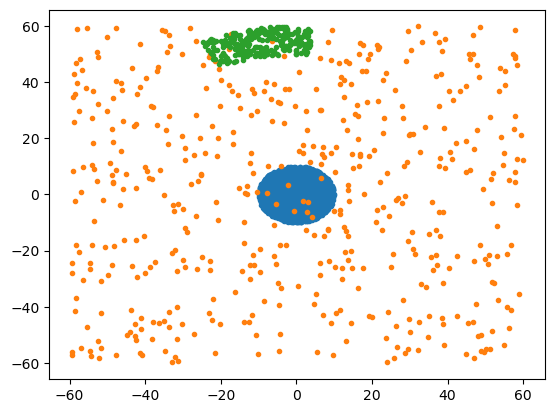

In [3]:
plt.plot(data_xs,data_ys, '.', color='C0')
plt.plot(noise_xs,noise_ys, '.', color='C1')
plt.plot(data1_xs,data1_ys, '.', color='C2')

In [4]:
from sklearn.cluster import DBSCAN
# DBSCAN.fit%matplotlib inline expects a an array where each entry is a "point"
X = []
for (x,y) in zip(data_xs, data_ys):
    X.append([x,y])

for (x,y) in zip(data1_xs, data1_ys):
    X.append([x,y])

for (x,y) in zip(noise_xs, noise_ys):
    X.append([x,y])


X = np.array(X)

In [5]:
print(len(X) == n1+n2+n3)

True


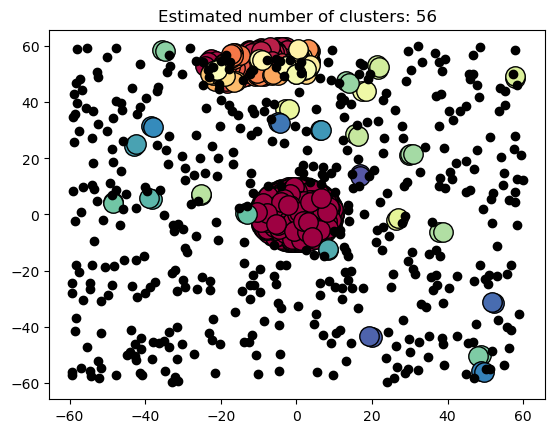

In [6]:
db = DBSCAN(eps=1, min_samples=2).fit(X)
labels = db.labels_
#print(len(X), len(labels), len(core_samples_mask))

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {len(unique_labels)}")
plt.show()

In [56]:
import subprocess
file_num='000007'
event_num=307
try:
    MACRO_CALL = f'runHGTD_Clustering.cxx("{file_num}",{event_num})'
    result = subprocess.run(['root', '-l', '-q', '-b', MACRO_CALL],
                            check=True, capture_output=True, text=True)

    print(result.stdout)
    track_clusters = []
    cluster_times, cluster_zs = [], []
    track_times = []
    all_times = []
    idx_time_dict = dict()
    all_indices = []
    current_block_idx = []
    current_block_times = []

    for line in result.stdout.splitlines():
        line = line.strip()
        if line == "---------":
            if current_block_idx:
                track_clusters.append(current_block_idx)
                track_times.append(current_block_times)
                current_block_idx = []
                current_block_times = []
            continue
        if "t:" in line:
            cluster_times.append(float(line[2:]))
        try:
            tup = line.split(",")
            trk_idx = int(tup[0])
            trk_time = float(tup[1])
            current_block_idx.append(trk_idx)
            current_block_times.append(trk_time)
            all_times.append(trk_time)
            all_indices.append(trk_idx)
            idx_time_dict[trk_idx] = trk_time
        except (ValueError, IndexError):
            continue
    if current_block_idx:
        track_clusters.append(current_block_idx)
        track_times.append(current_block_times)
except subprocess.CalledProcessError as e:
    print(f"Error executing root script: {e.stderr}")
    track_clusters = []
    cluster_times = []



Processing runHGTD_Clustering.cxx("000007",307)...
---------
t: 115.042
score: 9.52802
2039,121.575
13,113.945
366,164.865
1273,141.587
1338,79.4077
1465,79.906
1563,128.512
1637,115.109
1662,130.033
1715,20.4029
1762,156.944
1793,69.5286
1803,192.65
1902,152.541
1950,126.781
passes? 1
---------
---------
t: -126.382
score: 2.23361
1973,-96.458
1086,-48.8186
1402,-15.8701
1719,-27.4429
1884,-108.966
1934,-81.1605
2003,-33.7772
1905,-214.042
1547,-144.75
1552,-189.622
1621,-136.982
1732,-142.366
1923,-122.369
1941,-202.113
2072,-220.766
2088,-118.807
2145,-195.094
passes? 0
---------
---------
t: 1145.12
score: 0.000316775
1627,1145.12
passes? 0
---------
---------
t: 680.851
score: 0.0710431
1599,680.851
passes? 0
---------



In [53]:
print(all_times)

[121.575, 113.945, 164.865, 141.587, 79.4077, 79.906, 128.512, 115.109, 130.033, 20.4029, 156.944, 69.5286, 192.65, 152.541, 126.781, -96.458, -48.8186, -15.8701, -27.4429, -108.966, -81.1605, -33.7772, -214.042, -144.75, -189.622, -136.982, -142.366, -122.369, -202.113, -220.766, -118.807, -195.094, 1145.12, 680.851]


34
34


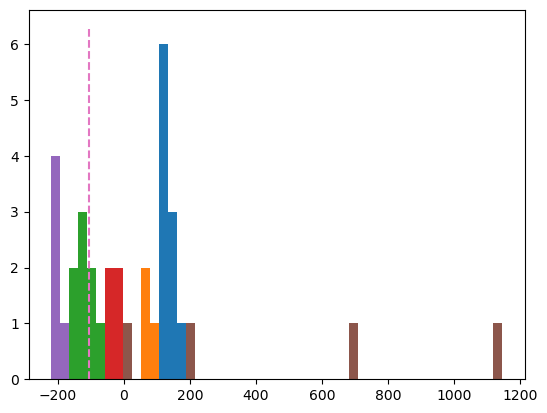

In [54]:
reshaped_times = np.array(all_times).reshape(-1, 1)
timehist = DBSCAN(eps=25,min_samples=3).fit(reshaped_times)
cluster_labels = timehist.labels_
unique_labels  = set(cluster_labels)
core_samples_mask = np.zeros_like(cluster_labels, dtype=bool)
core_samples_mask[timehist.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

print(len(reshaped_times))
print(len(timehist.labels_))
clusters = {x:[] for x in unique_labels}
for (time,label) in zip(reshaped_times,cluster_labels):
    clusters[label].append(time[0])

plt.hist(clusters.values(), bins=50, stacked=True);
#plt.hist(all_times,50)
plt.plot([-105.8]*2, list(plt.ylim()), linestyle='--')

In [63]:
import uproot
ANA_FILE = f'../ntuple-hgtd/user.mcardiff.45809429.Output._{file_num}.SuperNtuple.root'
tree = uproot.open(ANA_FILE)["ntuple"]
branch = tree.arrays(['Track_time','Track_timeRes','TruthVtx_time', 'Track_pt'])

def custom_dist(x,y):
    """Get the distance in res units, where x and y are 'raw' ntuple track indices"""
    x_t, x_s = idx_time_dict[x], branch.Track_timeRes[event_num][x]
    y_t, y_s = idx_time_dict[y], branch.Track_timeRes[event_num][y]
    diff = np.abs(x_t-y_t)
    return diff / np.sqrt(x_s**2+y_s**2)

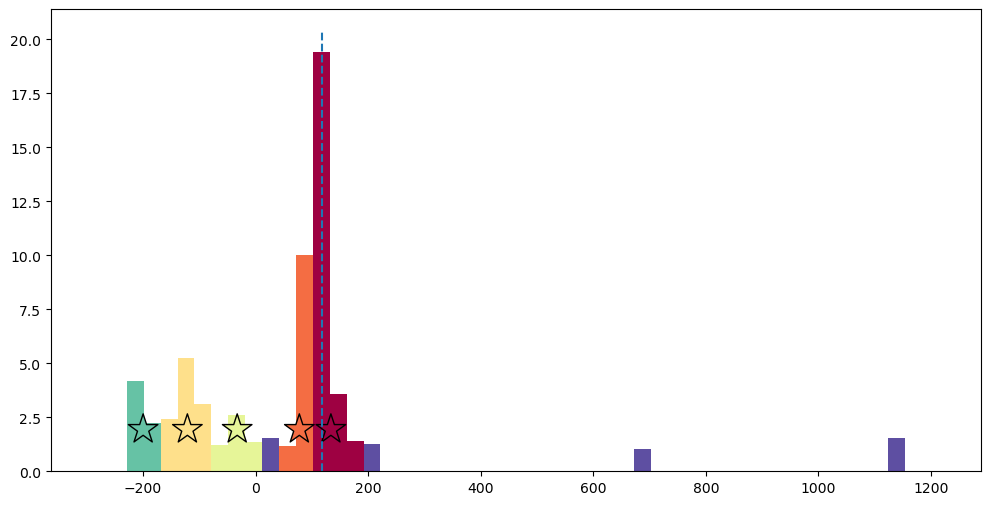

In [78]:
reshaped_indices = np.array(all_indices).reshape(-1, 1)

idxhist = DBSCAN(eps=3,min_samples=2).fit(reshaped_indices)
cluster_labels = timehist.labels_
unique_labels  = set(cluster_labels)
core_samples_mask = np.zeros_like(cluster_labels, dtype=bool)
core_samples_mask[timehist.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

idx_clusters = {x:[] for x in unique_labels}
time_clusters = {x:[] for x in unique_labels}
idx_weights  = {x:[] for x in unique_labels}
for (idx,label) in zip(reshaped_indices,cluster_labels):
    time_clusters[label].append(idx_time_dict[idx[0]])
    idx_clusters[label].append(idx[0])
    idx_weights[label].append(branch.Track_pt[event_num][idx[0]])

extended_min_time = min(all_times) - 0.05 * (max(all_times) - min(all_times))
extended_max_time = max(all_times) + 0.05 * (max(all_times) - min(all_times))

# Find the cluster values using the weighted avg procedure:
cluster_values = dict()
for label,indices in idx_clusters.items():
    if label == -1:
        continue
    num, den = 0.0,0.0
    for idx in indices:
        t, s = idx_time_dict[idx], branch.Track_timeRes[event_num][idx]
        num += t/(s*s)
        den += 1/(s*s)
    cluster_values[label] = num/den

histvals, bin_edges, patches = plt.hist(
    time_clusters.values(), weights=idx_weights.values(), bins=50, stacked=True,
    range=(extended_min_time, extended_max_time), color=colors)
plt.plot([branch.TruthVtx_time[event_num][0]]*2, list(plt.ylim()), linestyle='--')
plt.scatter(cluster_values.values(), [0.1*histvals.max()]*len(cluster_values.values()),
            marker="*", edgecolors='black',
            s=500, color=colors[:len(cluster_values.values())],)


## print(X)

In [40]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=20, centers=1, n_features=2, random_state=125)
print(X.shape)

(20, 2)


In [54]:
from scipy.spatial import distance
colors = ['red']*X.shape[0]
dist_matrix = distance.cdist(X, X, 'euclidean')
np.fill_diagonal(dist_matrix, np.inf) 
min_dist = np.min(dist_matrix)
print(min_dist)
min_index_flat = np.argmin(dist_matrix)
print(min_index_flat)
i, j = np.unravel_index(min_index_flat, dist_matrix.shape)
print(i,j)
colors[i] = 'blue'
colors[j] = 'blue'

0.1023917393646736
213
10 13


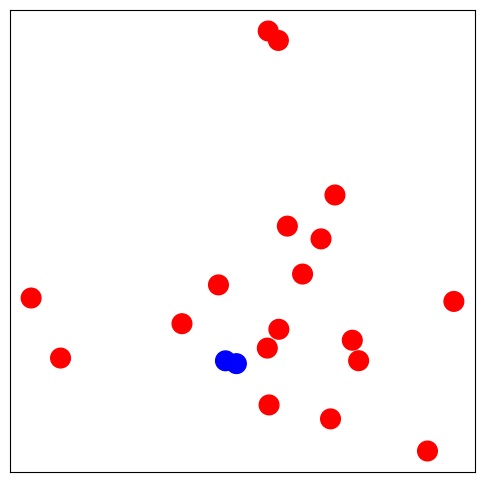

In [55]:
plt.scatter(X[:,0],X[:,1], s=200, c=colors)
plt.xticks([])
plt.yticks([])
plt.show()

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from matplotlib.animation import FuncAnimation

# --- Sample Data ---
# Create 2D data (tracks)
X, y = make_blobs(n_samples=20, centers=1, n_features=2, random_state=3734)

# Initial colors: all points are initially 'red'
initial_colors = np.array(['red'] * X.shape[0], dtype=object)

# Initial sizes: all points are the same size
sizes = np.array([50] * X.shape[0])

# --- Helper Function for Distance Matrix ---
def get_distance_matrix(points):
    """Calculates Euclidean distance matrix and sets diagonal to infinity."""
    dist_matrix = distance.cdist(points, points, 'euclidean')
    np.fill_diagonal(dist_matrix, np.inf)
    return dist_matrix

MovieWriter imagemagick unavailable; using Pillow instead.


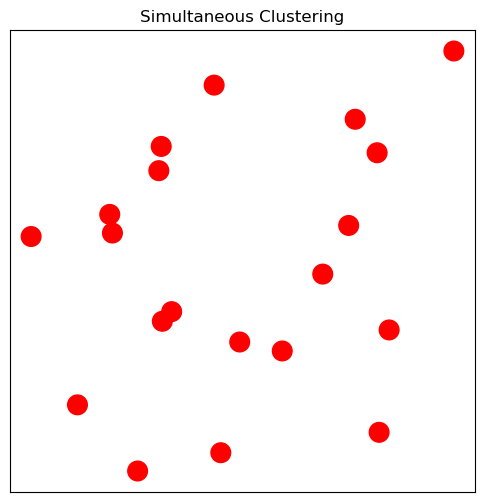

In [111]:
# --- Simultaneous Clustering Step ---
def simultaneous_clustering_step(X, initial_colors):
    """
    Performs one step of simultaneous clustering and returns the
    updated colors, minimum distance, and merged indices.
    """
    colors = initial_colors.copy() # Work on a copy of colors

    # 1. Calculate distance matrix
    dist_matrix = get_distance_matrix(X)

    # 2. Find the closest pair (min distance)
    min_index_flat = np.argmin(dist_matrix)
    i, j = np.unravel_index(min_index_flat, dist_matrix.shape)
    min_dist = dist_matrix[i, j]

    # 3. Change the colors of the merged points
    colors[i] = 'blue'
    colors[j] = 'blue'

    return colors, min_dist, (i, j)

# --- Animation Setup ---
updated_colors_sim, min_dist, (i, j) = simultaneous_clustering_step(X, initial_colors)

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title(f"Simultaneous Clustering")
#ax.set_xlabel("X-coordinate")
#ax.set_ylabel("")
ax.set_xticks([])
ax.set_yticks([])

scatter_sim = ax.scatter(X[:, 0], X[:, 1], c=initial_colors, s=200)

# Highlight the merged pair with an annotation
#ax.annotate(f'Point {i}', (X[i, 0], X[i, 1]), textcoords="offset points", xytext=(5, 5), ha='center', color='blue')
#ax.annotate(f'Point {j}', (X[j, 0], X[j, 1]), textcoords="offset points", xytext=(5, 5), ha='center', color='blue')

def animate_sim(frame):
    """Update function for the animation."""
    if frame == 0:
        # Step 1: Initial state (all red)
        scatter_sim.set_color(initial_colors)
        #ax.set_title(f"Simultaneous Clustering: Initial State")
    elif frame == 1:
        # Step 2: Merged state (closest pair is blue)
        scatter_sim.set_color(updated_colors_sim)
        #ax.set_title(f"Simultaneous Clustering: Closest Pair Merged\nMin Distance: {min_dist:.2f}")
        # Optionally draw a line between the merged points
        #line, = ax.plot([X[i, 0], X[j, 0]], [X[i, 1], X[j, 1]], 'b--', linewidth=1)
        # You would need to store this line to remove it, but for a simple 2-frame, it's fine.
    elif frame == 2:
        scatter_sim.set_color(final_colors)
    
    return scatter_sim,

# Create the animation (runs for 2 frames)
ani_sim = FuncAnimation(fig, animate_sim, frames=3, interval=1000, repeat=True, blit=False)

# Save the animation as a GIF file
ani_sim.save('sim_clustering_step.gif', writer='imagemagick', fps=0.66) # fps=0.66 means 1 frame every 1.5 seconds

# Display the GIF in the notebook
from IPython.display import Image
Image(url='sim_clustering_step.gif')

MovieWriter imagemagick unavailable; using Pillow instead.


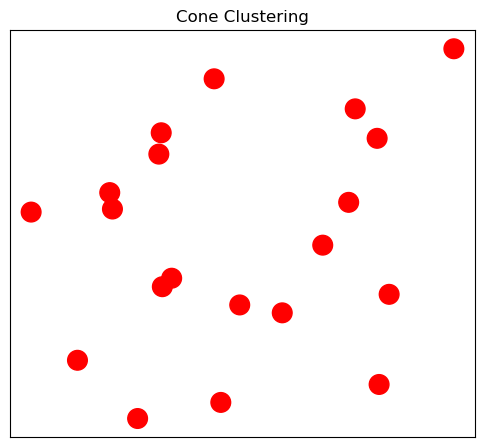

In [117]:
# --- Cone Clustering Step ---
def cone_clustering_step(X, initial_colors, cone_size=3.0):
    """
    Performs one step of cone clustering using a random seed and
    returns the updated colors, seed index, and merged indices.
    """
    colors = initial_colors.copy() # Work on a copy of colors
    N = X.shape[0]

    # 1. Select a random seed index
    seed_idx = np.random.randint(0, N)
    seed_point = X[seed_idx]

    merged_indices = []
    
    for i in range(N):
        if i == seed_idx:
            continue
            
        point = X[i]
        
        # Calculate dot product and magnitudes
        dist = np.linalg.norm(seed_point-point)
        
        # Avoid division by zero if a point is at (0,0)
        if dist > cone_size:
            continue
        merged_indices.append(i)

    # 4. Change the colors: seed is green, merged are blue
    colors[seed_idx] = 'green'
    for idx in merged_indices:
        colors[idx] = 'blue'

    cone = plt.Circle(seed_point, cone_size, alpha=0.2, color='green')

    return colors, seed_idx, merged_indices, cone

# --- Animation Setup ---
cone_size = 1.0
updated_colors_cone, seed_idx, merged_indices, cone = cone_clustering_step(X, initial_colors, cone_size)
intermediate_colors = initial_colors.copy()
intermediate_colors[seed_idx] = 'green'
num_merged = len(merged_indices)

fig2, ax2 = plt.subplots(figsize=(6, 6))
plt.gca().set_aspect('equal')
ax2.set_title(f"Cone Clustering")
ax2.set_xticks([])
ax2.set_yticks([])

scatter_cone = ax2.scatter(X[:, 0], X[:, 1], c=initial_colors, s=200)

def animate_cone(frame):
    """Update function for the animation."""
    if frame == 0:
        # Step 1: Initial state (all red)
        scatter_cone.set_color(initial_colors)
        #ax2.set_title(f"Cone Clustering")
        
        # Optional: draw the seed vector
        #ax2.quiver(0, 0, X[seed_idx, 0], X[seed_idx, 1], angles='xy', scale_units='xy', scale=1, color='green', width=0.005, label='Seed Vector')
        
    elif frame == 1:
        # Step 2: Merged state (seed is green, merged are blue)
        scatter_cone.set_color(intermediate_colors)
        ax2.add_patch(cone)
        #ax2.set_title(f"Cone Clustering")
    elif frame == 2:
        scatter_cone.set_color(updated_colors_cone)

    elif frame == 3:
        scatter_cone.set_color(final_colors_cone)
        cone.remove()
        
        
    return scatter_cone,

# Create the animation (runs for 2 frames)
ani_cone = FuncAnimation(fig2, animate_cone, frames=4, interval=1000, repeat=True, blit=False)
# Save the animation as a GIF file
ani_cone.save('cone_clustering_step.gif', writer='imagemagick', fps=0.66) # fps=0.66 means 1 frame every 1.5 seconds

# Display the GIF in the notebook
from IPython.display import Image
Image(url='cone_clustering_step.gif')
# plt.show() # Uncomment to run the animation

['magenta' 'magenta' 'magenta' 'cyan' 'orange' 'purple' 'blue' 'purple'
 'green' 'cyan' 'blue' 'green' 'orange' 'green' 'cyan' 'cyan' 'magenta'
 'red' 'orange' 'purple']


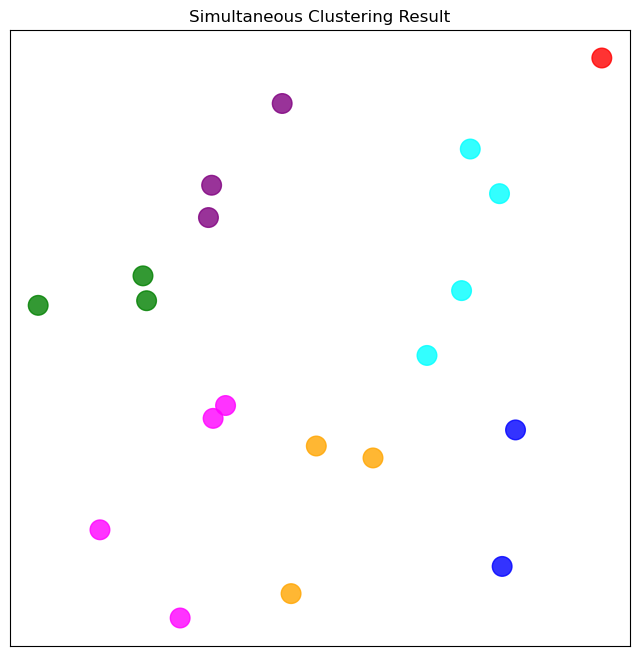

Final clustering result image saved as final_clustering_result.png


In [110]:
import numpy as np
import matplotlib.pyplot as plt

# Your predefined clusters
clusters_idx = [[17], [6, 10], [11, 8, 13], [19, 5, 7], [12, 4, 18], [9, 15, 3, 14], [1, 16, 0, 2]]

# --- 2. Define Colors ---
# Create a color palette with at least as many unique colors as you have clusters (7 in this case).
color_palette = [
    'red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 
    'lime', 'brown', 'pink' # Add more colors if needed
]
num_clusters = len(clusters_idx)

# --- 3. Create the Final Color Array ---
# Initialize the color array for all 20 points
final_colors_cone = np.empty(X.shape[0], dtype=object)

# Assign a unique color to all points in each cluster
for cluster_id, indices in enumerate(clusters_idx):
    color = color_palette[cluster_id % len(color_palette)] # Use modulo for safety if more clusters than colors
    
    # Assign the chosen color to all points in the current cluster
    final_colors[indices] = color

# --- 4. Generate and Save the Final Plot ---
fig, ax = plt.subplots(figsize=(8, 8))

# Scatter plot using the final_colors array
ax.scatter(X[:, 0], X[:, 1], c=final_colors, s=200, alpha=0.8)

# Optional: Annotate the points with their index for clarity
#for i in range(X.shape[0]):
#    ax.annotate(str(i), (X[i, 0], X[i, 1]), textcoords="offset points", xytext=(5, 5), ha='center', fontsize=8)

ax.set_xticks([])
ax.set_yticks([])
ax.set_title(f"Simultaneous Clustering Result")
#ax.grid(True, linestyle='--', alpha=0.6)
print(final_colors)
# Save the final image
plt.savefig('final_clustering_result.png', bbox_inches='tight')
plt.show() 

print("Final clustering result image saved as final_clustering_result.png")

In [112]:
print(seed_idx)

3


['blue' 'blue' 'blue' 'red' 'red' 'green' 'red' 'green' 'green' 'red'
 'purple' 'green' 'blue' 'green' 'red' 'red' 'blue' 'orange' 'red' 'green']


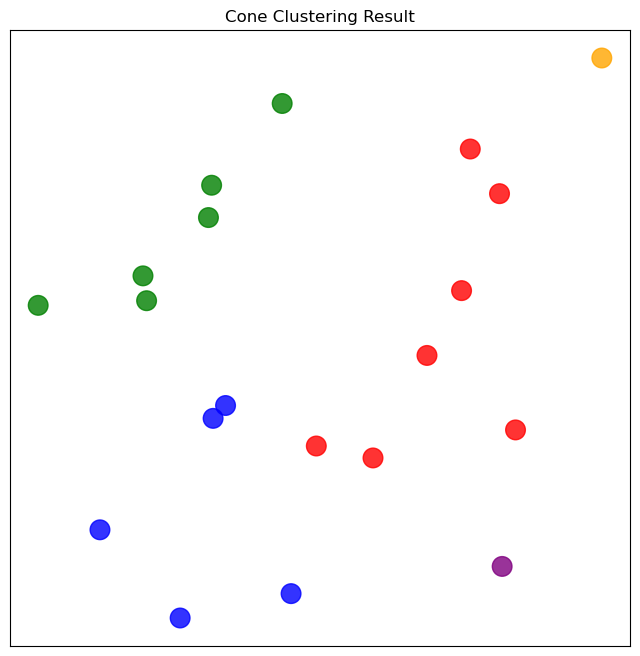

Final clustering result image saved as final_clustering_result.png


In [113]:
import numpy as np
import matplotlib.pyplot as plt

# Your predefined clusters
clusters_idx = [[3,4,6,9,14,15,18], [0,1,2,12,16], [8,5,7,11,13,19], [10], [17]]

# --- 2. Define Colors ---
# Create a color palette with at least as many unique colors as you have clusters (7 in this case).
color_palette = [
    'red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 
    'lime', 'brown', 'pink' # Add more colors if needed
]
num_clusters = len(clusters_idx)

# --- 3. Create the Final Color Array ---
# Initialize the color array for all 20 points
final_colors_cone = np.empty(X.shape[0], dtype=object)

# Assign a unique color to all points in each cluster
for cluster_id, indices in enumerate(clusters_idx):
    color = color_palette[cluster_id % len(color_palette)] # Use modulo for safety if more clusters than colors
    
    # Assign the chosen color to all points in the current cluster
    final_colors_cone[indices] = color

# --- 4. Generate and Save the Final Plot ---
fig, ax = plt.subplots(figsize=(8, 8))

# Scatter plot using the final_colors array
ax.scatter(X[:, 0], X[:, 1], c=final_colors_cone, s=200, alpha=0.8)

# Optional: Annotate the points with their index for clarity
#for i in range(X.shape[0]):
#    ax.annotate(str(i), (X[i, 0], X[i, 1]), textcoords="offset points", xytext=(5, 5), ha='center', fontsize=8)

ax.set_xticks([])
ax.set_yticks([])
ax.set_title(f"Cone Clustering Result")
#ax.grid(True, linestyle='--', alpha=0.6)
print(final_colors_cone)
# Save the final image
plt.savefig('final_clustering_result.png', bbox_inches='tight')
plt.show() 

print("Final clustering result image saved as final_clustering_result.png")